<a href="https://colab.research.google.com/github/mishra-suyash/stock-anish/blob/main/stock_predction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100
47/47 [==============================] - 6s 44ms/step - loss: 0.0216
Epoch 2/100
47/47 [==============================] - 3s 72ms/step - loss: 0.0021
Epoch 3/100
47/47 [==============================] - 4s 80ms/step - loss: 0.0021
Epoch 4/100
47/47 [==============================] - 3s 74ms/step - loss: 0.0018
Epoch 5/100
47/47 [==============================] - 3s 68ms/step - loss: 0.0019
Epoch 6/100
47/47 [==============================] - 4s 96ms/step - loss: 0.0016
Epoch 7/100
47/47 [==============================] - 3s 71ms/step - loss: 0.0015
Epoch 8/100
47/47 [==============================] - 2s 35ms/step - loss: 0.0015
Epoch 9/100
47/47 [==============================] - 2s 41ms/step - loss: 0.0018
Epoch 10/100
47/47 [==============================] - 2s 38ms/step - loss: 0.0015
Epoch 11/100
47/47 [==============================] - 2s 39ms/step - loss: 0.0013
Epoch 12/100
47/47 [==============================] - 3s 60ms/step - loss: 0.0014
Epoch 13/100
47/47 [=====

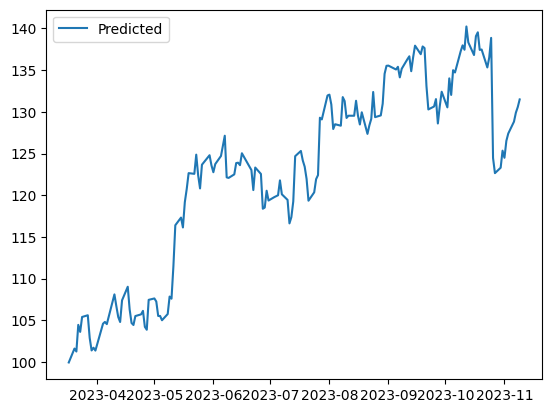

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Download data from 2020
url = 'https://query1.finance.yahoo.com/v7/finance/download/GOOGL?period1=1577836800&period2=9999999999&interval=1d&events=history'
data = pd.read_csv(url, index_col='Date', parse_dates=True)
data.head()

# Data preparation
data = data[['Close']]
data.head()

# Data normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Splitting data into train and test sets
train_size = int(len(data_scaled) * 0.8)
train_data = data_scaled[:train_size]
test_data = data_scaled[train_size:]

# Creating sequences
def create_sequences(data, seq_len=30):
  sequences = []
  for i in range(len(data) - seq_len):
    sequences.append(data[i:(i + seq_len)])
  return np.array(sequences)

seq_len = 30
train_sequences = create_sequences(train_data, seq_len)
test_sequences = create_sequences(test_data, seq_len)

# Building LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(seq_len, 1)))
model.add(LSTM(units=100))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model.fit(train_sequences, train_data[seq_len:], epochs=100, batch_size=16)

# Predictions
predictions = model.predict(test_sequences)
predictions = scaler.inverse_transform(predictions)

# Plotting actual and predicted values
#plt.plot(data.index[train_size + seq_len:], test_data[seq_len:], label='Actual')
plt.plot(data.index[train_size + seq_len:], predictions, label='Predicted')
plt.legend()
plt.show()
